In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import ensemble

In [3]:
df = pd.read_json("rf.json")

In [12]:
df.columns

Index(['NO2/40LD02 (µg/m³)', 'NO2/40R822 (µg/m³)', 'NO2/40R891 (µg/m³)',
       'NO2/40R892 (µg/m³)', 'NO2/40R897 (µg/m³)', 'NO2/40SZ01 (µg/m³)',
       'NO2/41B001 (µg/m³)', 'NO2/41B004 (µg/m³)', 'NO2/41B006 (µg/m³)',
       'NO2/41B008 (µg/m³)',
       ...
       'WD/44M705 (°G)', 'WD/44N029 (°G)', 'WD/44R701 (°G)', 'WS/41R001 (m/s)',
       'WS/41R012 (m/s)', 'WS/42M802 (m/s)', 'WS/44M705 (m/s)',
       'WS/44N029 (m/s)', 'WS/44R701 (m/s)', 'p/44N029 (hPa)'],
      dtype='object', length=169)

In [4]:
df = df.resample("1D").mean().interpolate().ffill().bfill()

In [5]:
c = df.filter(regex="NO2|O3").columns
cm = df.filter(regex="^p|^T|^W|^R").columns
cm

Index(['T/41R001 (°C)', 'T/42M802 (°C)', 'T/42N016 (°C)', 'T/42N035 (°C)',
       'T/42N054 (°C)', 'T/42R020 (°C)', 'T/42R802 (°C)', 'T/42R803 (°C)',
       'T/42R804 (°C)', 'T/42R805 (°C)', 'T/42R811 (°C)', 'T/42R817 (°C)',
       'T/42R818 (°C)', 'T/42R823 (°C)', 'T/42R831 (°C)', 'T/42R834 (°C)',
       'T/43H201 (°C)', 'T/43M204 (°C)', 'T/43N113 (°C)', 'T/43R221 (°C)',
       'T/43R223 (°C)', 'T/44M705 (°C)', 'T/44N012 (°C)', 'T/44N029 (°C)',
       'T/44N052 (°C)', 'T/44R701 (°C)', 'T/44R702 (°C)', 'T/44R710 (°C)',
       'T/44R731 (°C)', 'T/44R740 (°C)', 'T/44R750 (°C)', 'T/45R502 (°C)',
       'T/45R511 (°C)', 'T/T2H801 (°C)', 'WD/41R001 (°G)', 'WD/41R012 (°G)',
       'WD/42M802 (°G)', 'WD/44M705 (°G)', 'WD/44N029 (°G)', 'WD/44R701 (°G)',
       'WS/41R001 (m/s)', 'WS/41R012 (m/s)', 'WS/42M802 (m/s)',
       'WS/44M705 (m/s)', 'WS/44N029 (m/s)', 'WS/44R701 (m/s)',
       'p/44N029 (hPa)'],
      dtype='object')

In [23]:
X = df.loc[:"2021",cm]
X2 = df.loc["2021":,cm]

In [24]:
X["dow"] = X.index.dayofweek
X["unix"] = X.index.map(pd.Timestamp.timestamp)
X2["dow"] = X2.index.dayofweek
X2["unix"] = X2.index.map(pd.Timestamp.timestamp)

In [25]:
y = df.loc[:"2021",'NO2/41R002 (µg/m³)']
y2 = df.loc["2021":,'NO2/41R002 (µg/m³)']

In [26]:
rf = ensemble.RandomForestRegressor()
rf.fit(X.values, y.values)

RandomForestRegressor()

In [27]:
rf.score(X2.values, y2.values)

0.9576789120357954

In [29]:
y2hat = rf.predict(X2.values)

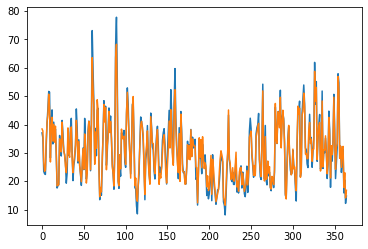

In [33]:
fig, axe = plt.subplots()
axe.plot(y2.values)
axe.plot(y2hat)

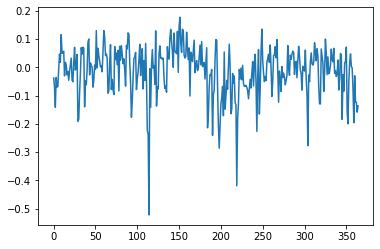

In [35]:
fig, axe = plt.subplots()
axe.plot((y2.values - y2hat)/y2.values)